This jupyter notebook contains code to answer some questions on the Legal Text Dataset used in my thesis.

In [2]:
import pandas as pd
df_legal = pd.read_pickle('../data/legal.pkl')

In [7]:
# First print the number of documents/paragraphs in the dataset
print(len(df_legal))

106151


There are 106151 datapoints are in the dataset.

In [10]:
#Lets now look at a single document to understand the structure of the data
df_legal.head(1)

,name,date,periodikum,zitstelle,langue,gliederungsbezeichnung,paragraph,text
0,1-DM-GoldmünzG,2000-12-27,BGBl I,"2000, 2045",Gesetz über die Ausprägung einer 1-DM-Goldmünz...,Erster Abschnitt,§ 1,"Die Deutsche Bundesbank wird ermächtigt, zum G..."


How long are the legal paragraphs on average?

In [11]:
df_legal['text'].apply(lambda x: len(x.split(" "))).mean()

167.1377942741943

The average length of the legal paragraphs is ~167 words.


How long are the legal paragraphs on average? (there might be some empty entries or very short paragraphs, lets try filtering them out, by including only paragraphs with 10 or more tokens in our analysis)

In [13]:
df_legal['text'][df_legal['text'].apply(lambda x: len(x.split(" ")) >= 10)].apply(lambda x: len(x.split(" "))).mean()

183.54178757980267

The answer is very similar, the average length of legal paragraphs(excluding pargraphs with less than 10 tokens) is ~184.

Now lets look at the distribution in a histogram.

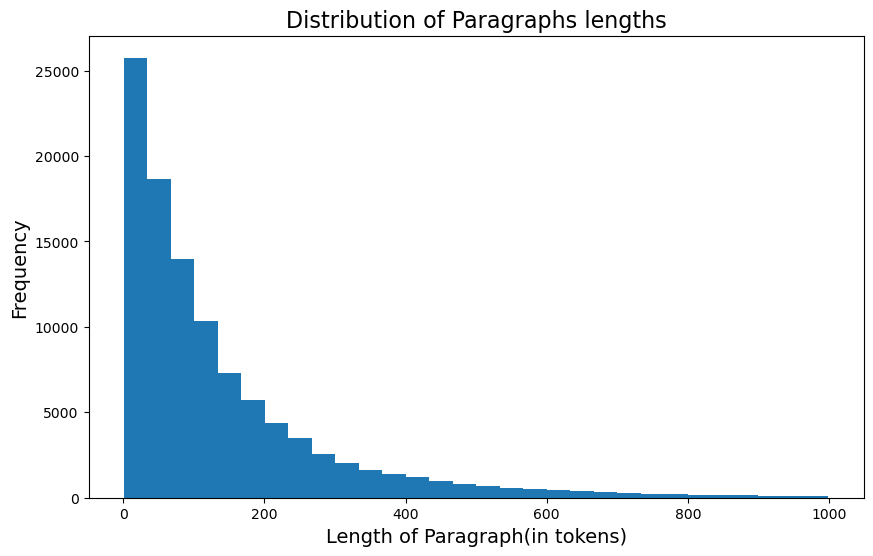

In [31]:
import matplotlib.pyplot as plt
# Calculate word count for each entry in the specified column
word_counts = df_legal['text'].apply(lambda x: len(x.split(" ")))

# Filter out word counts that are greater than 1000
filtered_word_counts = word_counts[(word_counts < 1000)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_word_counts, bins=30)

# Set the title and labels
plt.title('Distribution of Paragraphs lengths', fontsize=16)
plt.xlabel('Length of Paragraph(in tokens)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig("paragraph_length_distribution.pdf", bbox_inches='tight')
# Show the plot
plt.show()

Pretty much the same with 166.7 words.

Lets look at one special case where the paragraph had more than 20000 token.

In [27]:
df_legal['word_counts'] = df_legal['text'].apply(lambda x: len(x.split(" ")))

In [30]:
df_legal['text'][df_legal['word_counts'] > 20000].head(1).values

array(['(Fundstelle: Anlageband zu BGBl. I 1996, Nr. 10, S. 3 - 157)NummerÜbersichtSeiteA.Gebühren in besonderen Fällen51 bis 109B.Grundleistungen und allgemeine Leistungen51 bis 15I.Allgemeine Beratungen und Untersuchungen5A bis K 1II.Zuschläge zu Beratungen und Untersuchungen nach Nummer 1, 3, 4, 5, 6, 7 oder 8720 bis 34III.Spezielle Beratungen und Untersuchungen845 bis 62IV.Visiten, Konsiliartätigkeit, Besuche, Assistenz10E bis K 2V.Zuschläge zu den Leistungen nach den Nummern 45 bis 62, 100 und 1011270 bis 96VI.Berichte, Briefe13100 bis 109VII.Todesfeststellung14200 bis 449C.Nichtgebietsbezogene Sonderleistungen14200 bis 247I.Anlegen von Verbänden14250 bis 298II.Blutentnahmen, Injektionen, Infiltrationen, Infusionen, Transfusionen, Implantation, Abstrichentnahmen16300 bis 321III.Punktionen19340 bis 374IV.Kontrastmitteleinbringungen20375 bis 399V.Impfungen und Testungen21401 bis 424VI.Sonographische Leistungen22427 bis 437VII.Intensivmedizinische und sonstige Leistungen24440 bis 449

It was a appendix to the BGB, detailing the determination of fees in the medical field for various services.